In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [54]:
dfTrain = pd.read_csv('/content/bank customer churn dataset.csv')

In [55]:
dfTrain.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [57]:
dfTrain.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [58]:
dfTrain.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [59]:
dfTrain.Age.mean()

38.9218

In [60]:
dfTrain = pd.get_dummies(dfTrain, columns=['Geography', 'Gender'], drop_first=True)

In [61]:
dfTrain.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [62]:
y = dfTrain['Exited']

In [63]:
X = dfTrain.drop('Exited', axis = 1)

In [64]:
X.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [65]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [66]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [68]:
X_train.shape

(8000, 11)

In [69]:
X_test.shape


(2000, 11)

In [70]:
y_train.shape

(8000,)

In [71]:
y_test.shape

(2000,)

In [72]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [73]:
X_train_scaled

array([[ 1.27863539,  0.75808981,  0.34495107, ..., -0.57869742,
        -0.56926697, -1.09858844],
       [ 0.7084703 ,  2.83605094, -0.69444952, ..., -0.57869742,
        -0.56926697,  0.91025899],
       [ 1.5274347 ,  1.79707038,  1.38435167, ..., -0.57869742,
         1.75664505, -1.09858844],
       ...,
       [ 0.32490469,  0.28582592, -1.73385012, ..., -0.57869742,
        -0.56926697, -1.09858844],
       [-0.55625954,  0.38027869, -1.04091639, ..., -0.57869742,
         1.75664505,  0.91025899],
       [ 0.06573874, -1.31987132, -1.04091639, ...,  1.72801876,
        -0.56926697,  0.91025899]])

In [74]:
X_test_scaled

array([[ 0.21554379,  0.82251464,  0.67022881, ...,  1.72744428,
        -0.59197879, -1.08565613],
       [ 1.68395866, -0.26934091,  0.32713753, ..., -0.57888987,
        -0.59197879, -1.08565613],
       [-1.67388513,  1.41807222,  1.69950264, ..., -0.57888987,
        -0.59197879, -1.08565613],
       ...,
       [ 0.02043972, -0.26934091, -1.38831885, ..., -0.57888987,
         1.6892497 , -1.08565613],
       [-1.24260244,  0.02843787,  0.32713753, ..., -0.57888987,
        -0.59197879,  0.92110197],
       [-0.90373747, -0.26934091, -0.01595374, ..., -0.57888987,
         1.6892497 ,  0.92110197]])

In [75]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [76]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [77]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [79]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5169 - accuracy: 0.7752 - val_loss: 0.4486 - val_accuracy: 0.8138
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8014 - val_loss: 0.4294 - val_accuracy: 0.8213
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8077 - val_loss: 0.4208 - val_accuracy: 0.8288
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8128 - val_loss: 0.4118 - val_accuracy: 0.8319
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8166 - val_loss: 0.4035 - val_accuracy: 0.8313
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8231 - val_loss: 0.3907 - val_accuracy: 0.8419
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8348 - val_loss: 0.3772 - val_accuracy: 0.8487

In [80]:
model.layers[0].get_weights()

[array([[ 1.8825457e-02,  1.5412256e-01, -4.2916123e-02, -1.7173637e-01,
          8.3086655e-02,  1.9408581e-01,  2.3155408e-01,  2.8389060e-01,
          1.7456463e-02,  2.3750751e-01,  9.5875841e-03],
        [ 5.8228541e-02, -8.4016196e-02,  8.0156147e-01, -1.9975133e-02,
         -5.8594108e-01, -1.5440966e-01,  3.0298907e-01, -8.6531419e-01,
         -7.3465711e-01,  2.0459308e-01,  3.0478247e-02],
        [ 2.5028297e-01, -2.4089221e-02, -3.9192247e-01, -8.3488065e-01,
          1.9711787e-01, -3.9136130e-01,  3.4499097e-01, -8.1871692e-03,
         -1.0143161e-02,  2.5701024e-02, -5.1547371e-02],
        [ 3.6352381e-01, -4.7164118e-01,  1.7165627e-01,  4.1319579e-01,
          1.1831676e-01, -4.5185484e-02, -5.1349711e-01, -1.8277168e-01,
         -1.0018940e-01, -1.5285950e+00,  1.1045874e-01],
        [-7.0325768e-01,  1.0936146e+00, -3.5704446e-01, -4.6932161e-01,
         -9.4201446e-02, -5.5745929e-01, -2.5695264e-01, -8.4737815e-02,
          4.0948346e-02, -2.3506433e-0

In [81]:
model.layers[1].get_weights()

[array([[ 1.96505532e-01,  2.19312161e-01, -2.53508031e-01,
         -3.94124299e-01,  2.01281905e-01,  6.56340241e-01,
         -5.08127570e-01,  1.33416042e-01,  5.52147269e-01,
         -1.04080951e+00, -1.53974682e-01],
        [ 7.04665855e-02, -1.06149161e+00, -9.14958268e-02,
         -1.83804512e-01,  4.41358745e-01,  1.57604113e-01,
          4.36294109e-01,  5.45055032e-01,  3.38592827e-01,
          3.76764446e-01,  2.43181452e-01],
        [ 3.58484477e-01, -3.87548387e-01,  3.44403446e-01,
          8.22052173e-03,  1.56924933e-01,  2.05661386e-01,
         -6.20389521e-01,  2.16485575e-01,  2.13331521e-01,
          3.35005313e-01,  2.17139333e-01],
        [ 2.50434894e-02, -1.35616049e-01,  1.53756395e-01,
         -2.49617442e-01, -2.39074737e-01,  2.99477994e-01,
         -7.07401276e-01, -2.17936262e-01,  5.37876248e-01,
          6.37294725e-02,  4.79349494e-01],
        [-3.98483612e-02, -3.71806294e-01,  1.77132264e-01,
          2.63268920e-03, -5.69177747e-01, -

In [82]:
y_log = model.predict(X_test_scaled)

In [83]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8565

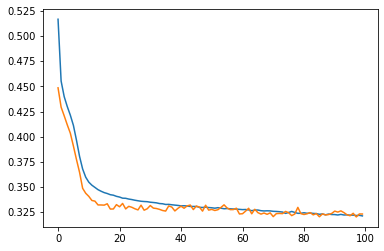

In [89]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

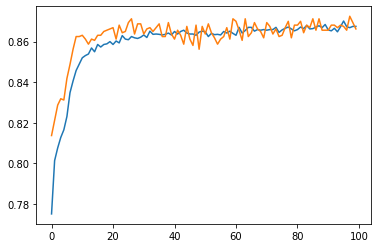

In [90]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])